<h1 style="text-align: center;">Group Assignment (Ad-Click)</h1>

<h2 style="text-align: center;">Group No - 07 Details</h2>

<table style="width: 100%; border-collapse: collapse; text-align: center; font-size: 16px;">
  <tr style="background-color: #f2f2f2;">
    <th></th>
    <th>Member-1</th>
    <th>Member-2</th>
    <th>Member-3</th>
    <th>Member-4</th>
    <th>Member-5</th>
  </tr>
  <tr>
    <td style="font-weight: bold; background-color: #f9f9f9;">Names</td>
    <td>Aditya Gujjalwar</td>
    <td>Ranveer Bhonsale</td>
    <td>Sagar Kedare</td>
    <td>Deepak Singh</td>
    <td>Omparv Channa</td>
  </tr>
  <tr>
    <td style="font-weight: bold; background-color: #f9f9f9;">Enrollment Numbers</td>
    <td>24810021</td>
    <td>24810014</td>
    <td>24810027</td>
    <td>24810063</td>
    <td>24810016</td>
  </tr>
</table>


<div style="text-align: center; font-size: 16px; line-height: 1.6;">
  <p><b>Subject Name:</b> <em>Data Science for Managers</em></p>
  <p><b>Submitted to Professor:</b> <em>Amit Upadhyay</em></p>
</div>


<hr style="border: none; height: 2px; background-color: #ddd; margin-top: 40px;">

<h2 style="text-align: center; font-weight: bold;">🎯 Goal of the Project</h2>

<p style="text-align: center; font-size: 17px; max-width: 80%; margin: auto; line-height: 1.6;">
  The goal of the project is to predict whether a particular user is likely to click on a specific advertisement or not, based on their features.
</p>

<hr style="border: none; height: 2px; background-color: #444; margin-top: 40px;">
<p style="text-align: center; color: #666; font-style: italic;">Code begins below 👇</p>


## 1. Importing libraries

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import pickle

## 2. Importing dataset

In [8]:
ad_dataset = pd.read_csv("advertising.csv")

In [9]:
ad_dataset.head(10)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   
5                     59.99   23     59761.56                226.74   
6                     88.91   33     53852.85                208.36   
7                     66.00   48     24593.33                131.76   
8                     74.53   30     68862.00                221.51   
9                     69.88   20     55642.32                183.82   

                           Ad Topic Line              City  Male     Country  \
0     Cloned 5thgeneration orchestration       Wrightburgh     0     Tunisia   
1     Monitored national standardization         West Jodi     1       Nauru   
2       Organic bottom-line service-desk          Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame    West Terrifurt     1       Italy   
4          Robust logistical utilization      South Manuel     0     Iceland   
5        Sharable client-driven software         Jamieberg     1      Norway   
6             Enhanced dedicated support       Brandonstad     0     Myanmar   
7               Reactive local challenge  Port Jefferybury     1   Australia   
8         Configurable coherent function        West Colin     1     Grenada   
9     Mandatory homogeneous architecture        Ramirezton     1       Ghana   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0  
5  2016-05-19 14:30:17              0  
6  2016-01-28 20:59:32              0  
7  2016-03-07 01:40:15              1  
8  2016-04-18 09:33:42              0  
9  2016-07-11 01:42:51              0

## 3. EDA

In [11]:
ad_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [12]:
print("\033[1mStatistics of Numerical Columns in Dataset \033[0m")
ad_dataset.describe()

Statistics of Numerical Columns in Dataset 


Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

In [13]:
print("\033[1mAttributes in Dataset \033[0m")
ad_dataset.columns

Attributes in Dataset 


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [14]:
print("\033[1mTotal Number of Null Records in Each Attribute \033[0m")
ad_dataset.isnull().sum()

Total Number of Null Records in Each Attribute 


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [15]:
print(f"Number of rows in dataset are:\033[1;3m {ad_dataset.shape[0]}\033[0m")
print(f"Number of columns in dataset are:\033[1;3m {ad_dataset.shape[1]}\033[0m")

Number of rows in dataset are: 1000
Number of columns in dataset are: 10


In [16]:
print(f"Number of Duplicate Records in The Dataset:\033[1;3m {ad_dataset.duplicated().sum()}\033[0m ")

Number of Duplicate Records in The Dataset: 0 


In [17]:
ad_dataset['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

## 4. Data Cleaning

As observed in the EDA, there is no missing data in the dataset.  
However, we made the following considerations for feature handling:

- **Advertisement Topic Line**:  
  This feature was dropped. Extracting meaningful information from this column would require Natural Language Processing (NLP) techniques, which is outside the current assignment scope.

- **City and Country**:  
  These were treated as **categorical features** and encoded into **numeric values** using label encoding.

- **Timestamp**:  
  Handling the 'Timestamp' was slightly more complex.  
  Instead of using the raw timestamp, we extracted two meaningful features:
  - **Month**: representing the month the activity occurred
  - **Hour**: representing the hour of the day  
  These were treated as categorical variables initially and then encoded numerically.

In [20]:
ad_dataset['City Codes']= ad_dataset['City'].astype('category').cat.codes
ad_dataset['Country Codes'] = ad_dataset['Country'].astype('category').cat.codes
ad_dataset['Month'] = ad_dataset['Timestamp'].apply(lambda x: x.split('-')[1])
ad_dataset['Hour'] = ad_dataset['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])
ad_dataset = ad_dataset.drop(labels=['Ad Topic Line','City','Country','Timestamp'], axis=1)

In [21]:
ad_dataset.head(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   Clicked on Ad  City Codes  Country Codes Month Hour  
0              0         961            215    03   00  
1              0         903            147    04   01  
2              0         111            184    03   20  
3              0         939            103    01   02  
4              0         805             96    06   03

## 5. Data Visualisation

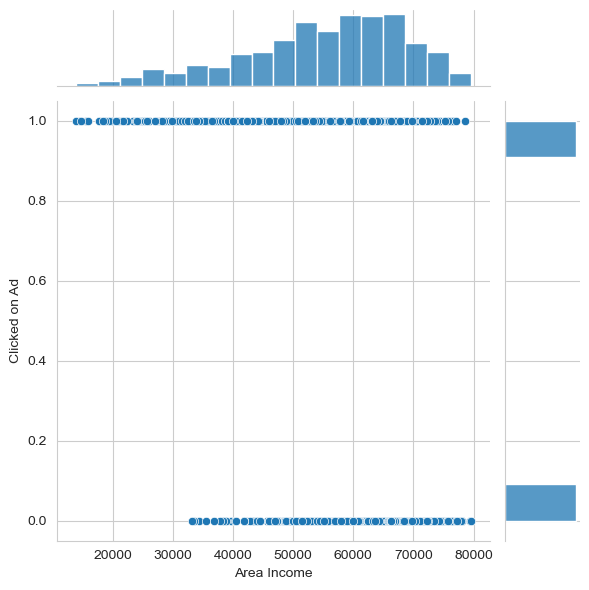

In [23]:
sns.jointplot(x='Area Income', y='Clicked on Ad',data=ad_dataset)

 Here, we can see that most of the internet users are having age in the range of 26 to 42 years.


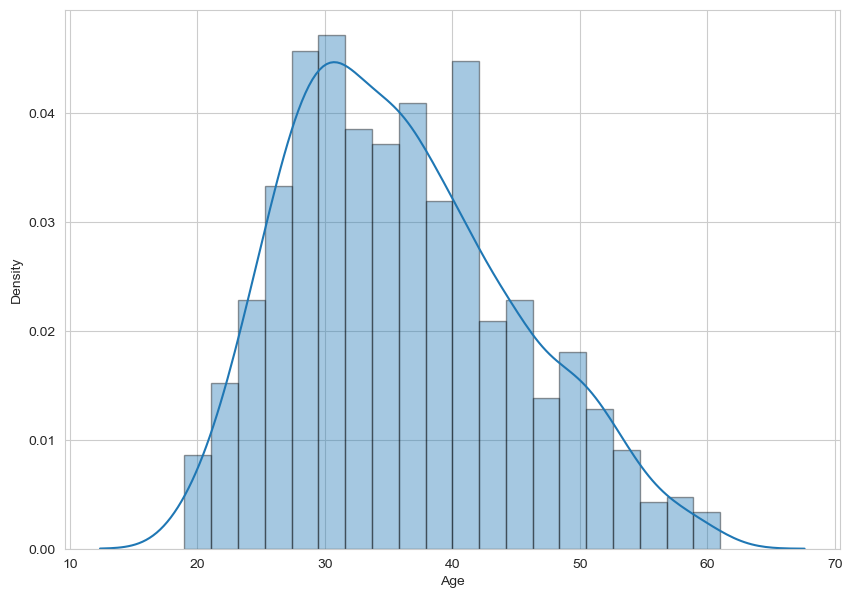

In [24]:
plt.figure(figsize=(10,7))
sns.distplot(ad_dataset['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))
print("\033[1;3m Here, we can see that most of the internet users are having age in the range of 26 to 42 years.\033[0m")

In [25]:
print('Age of the oldest person:', ad_dataset['Age'].max(), 'Years')
print('Age of the youngest person:', ad_dataset['Age'].min(), 'Years')
print('Average age in dataset:', ad_dataset['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


In [26]:
ad_dataset.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad    0    1
Male                   
0              250  269
1              250  231

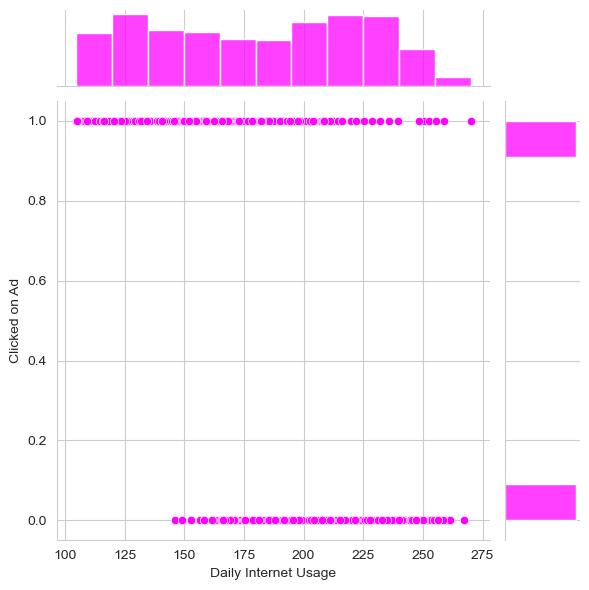

In [27]:
sns.jointplot(x='Daily Internet Usage', y='Clicked on Ad',data=ad_dataset,color='magenta')

 Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k. 


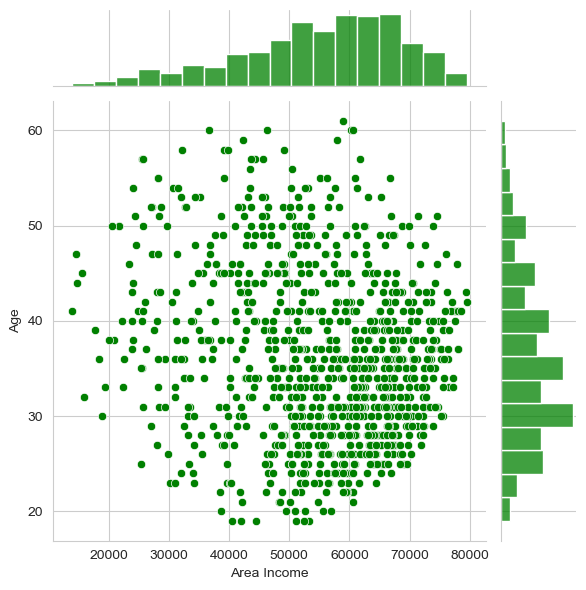

In [28]:
sns.jointplot(x='Area Income',y='Age',data=ad_dataset,color='green')
print("\033[1;3m Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k. \033[0m")

 From the above plot its evident that the age group of 25-40 is most active on the internet. 


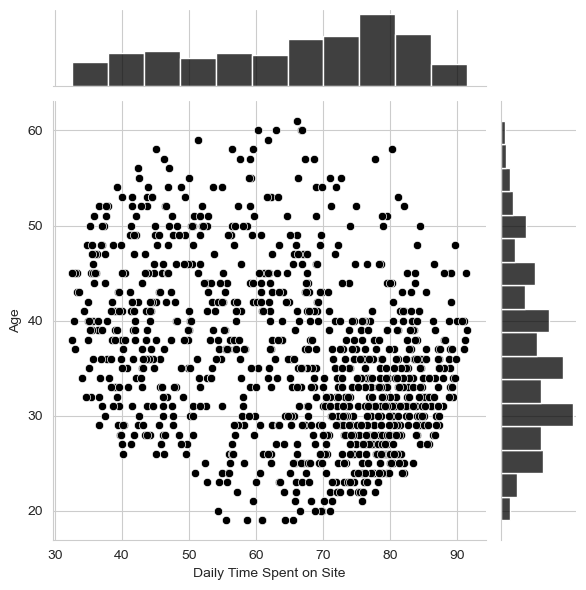

In [29]:
#jointplot showing Daliy time spent on site vs Age
sns.jointplot(x='Daily Time Spent on Site',y='Age',data=ad_dataset,color='Black')
print("\033[1;3m From the above plot its evident that the age group of 25-40 is most active on the internet. \033[0m")

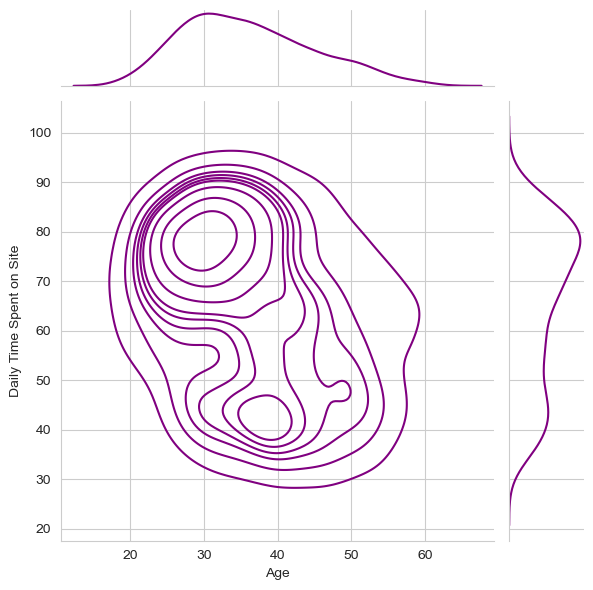

In [30]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_dataset, color='purple',kind="kde")

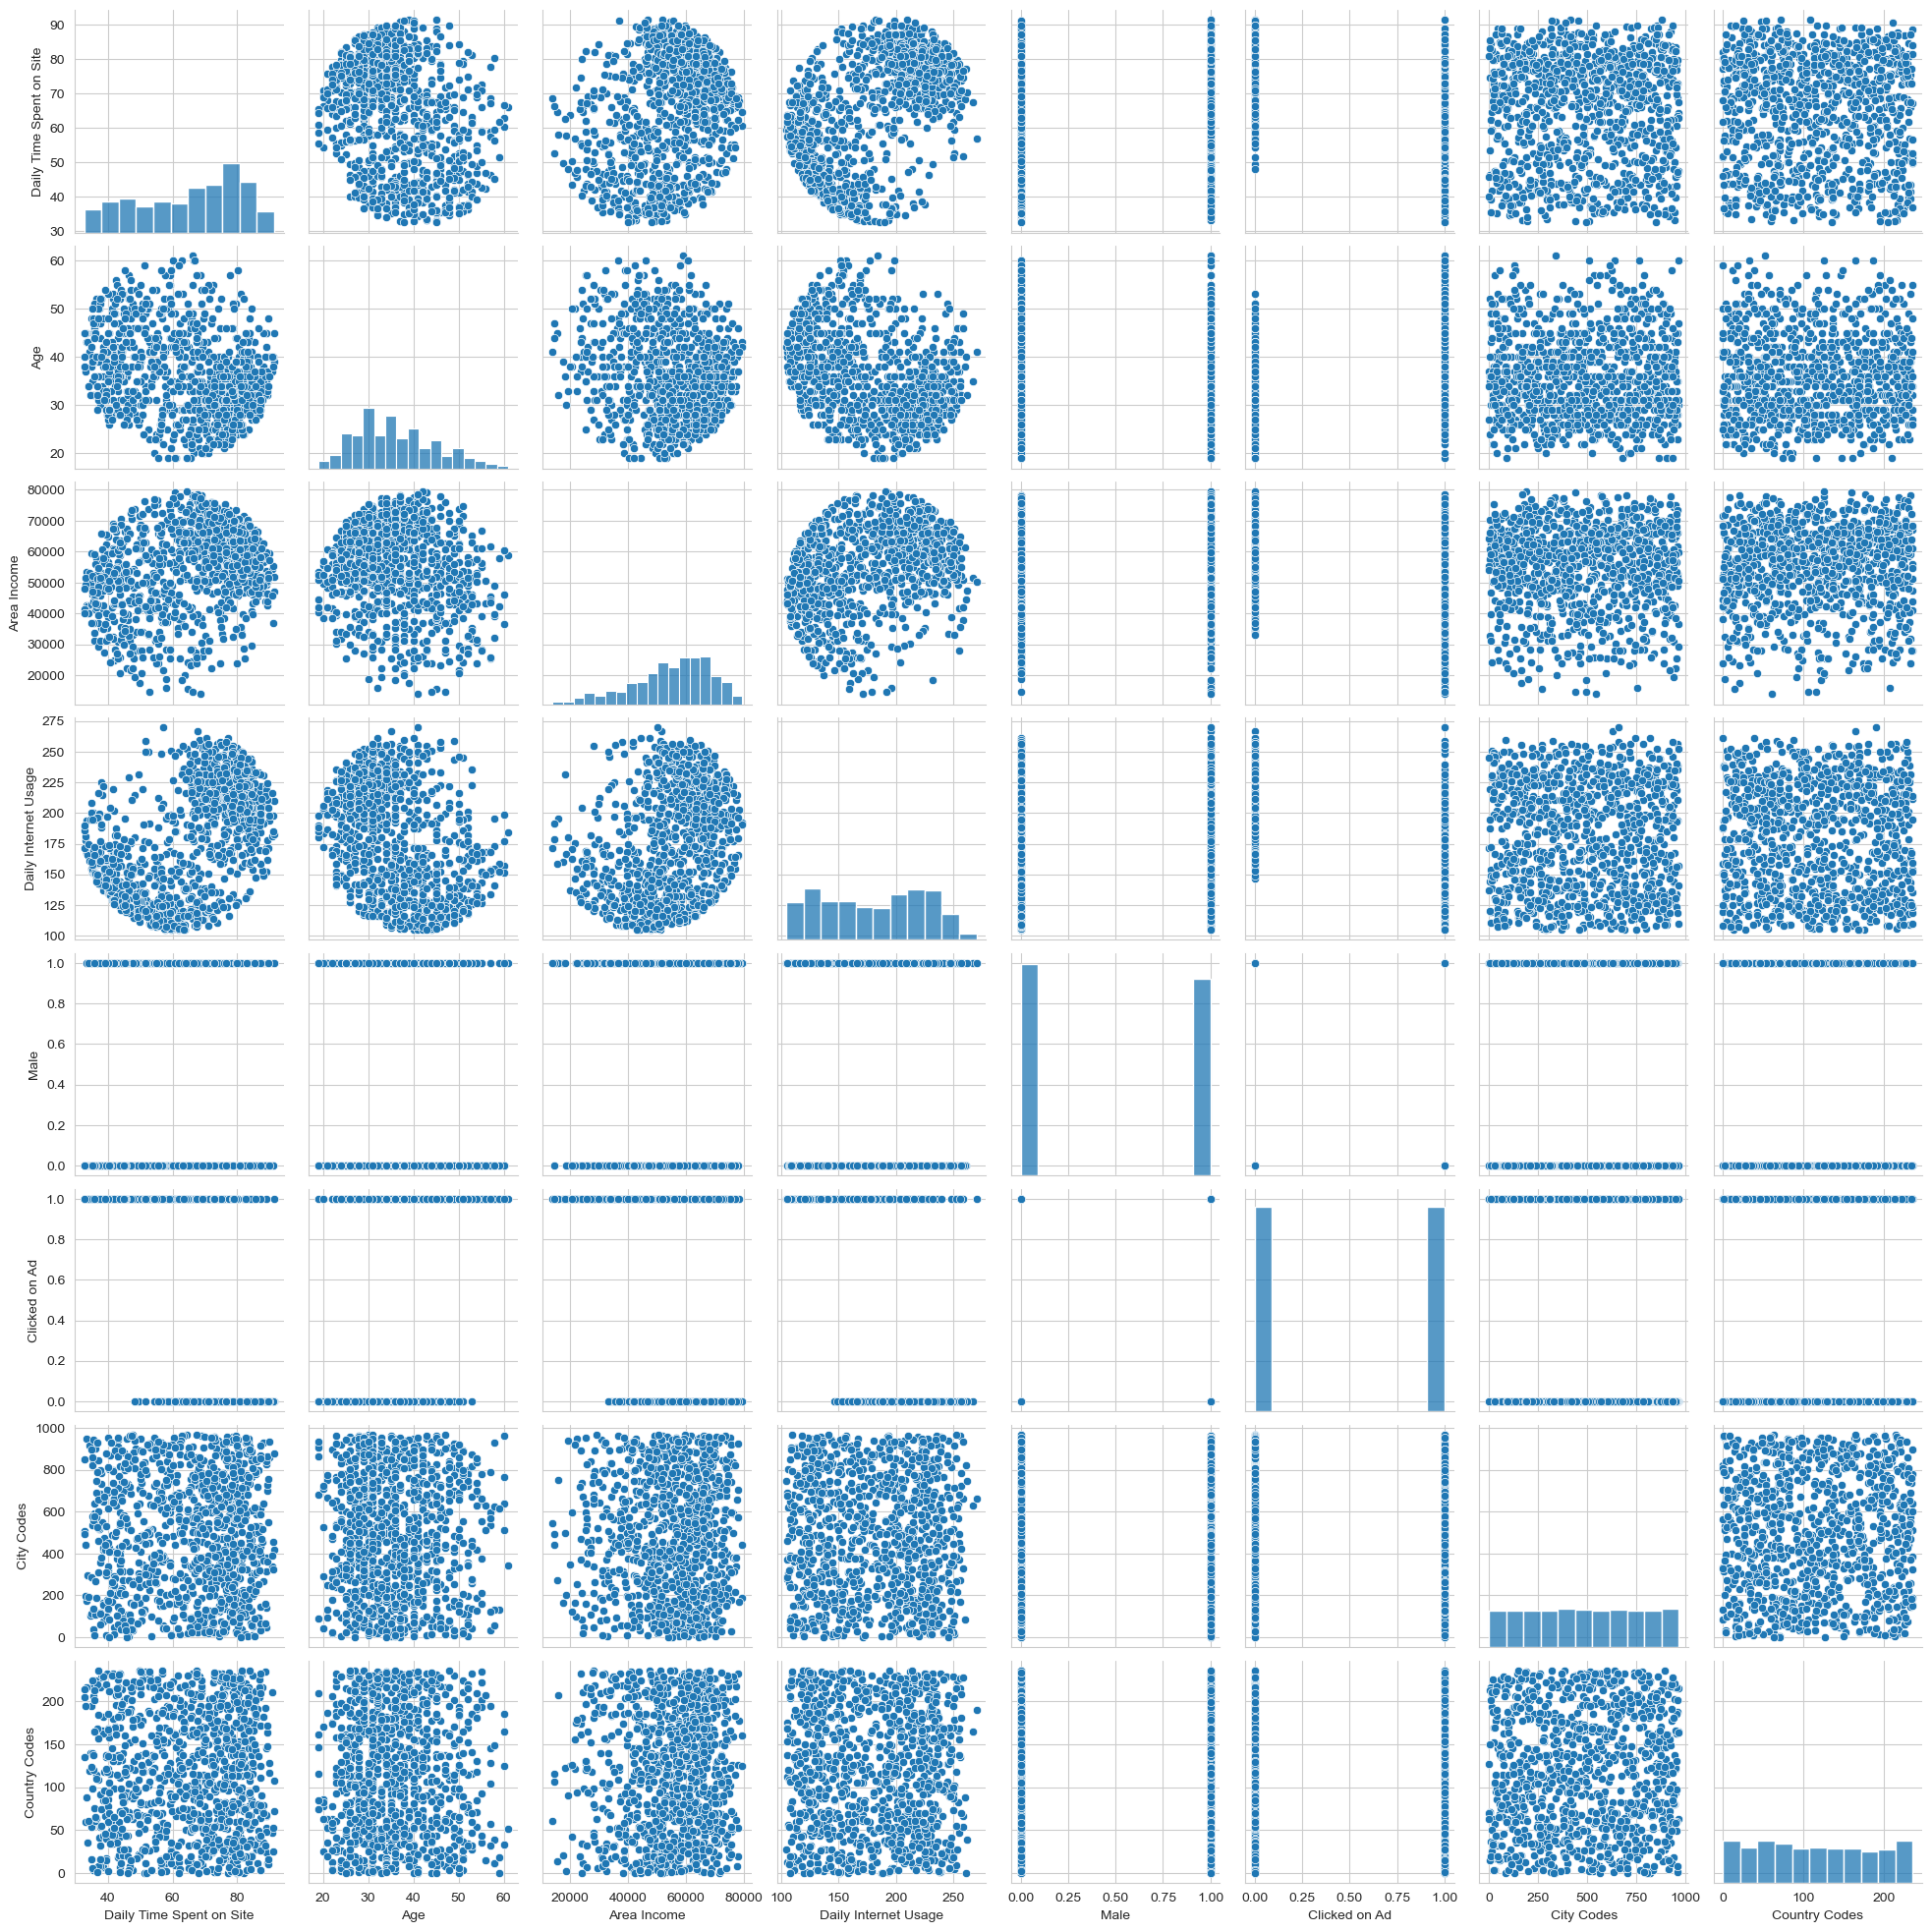

In [31]:
sns.pairplot(ad_dataset)

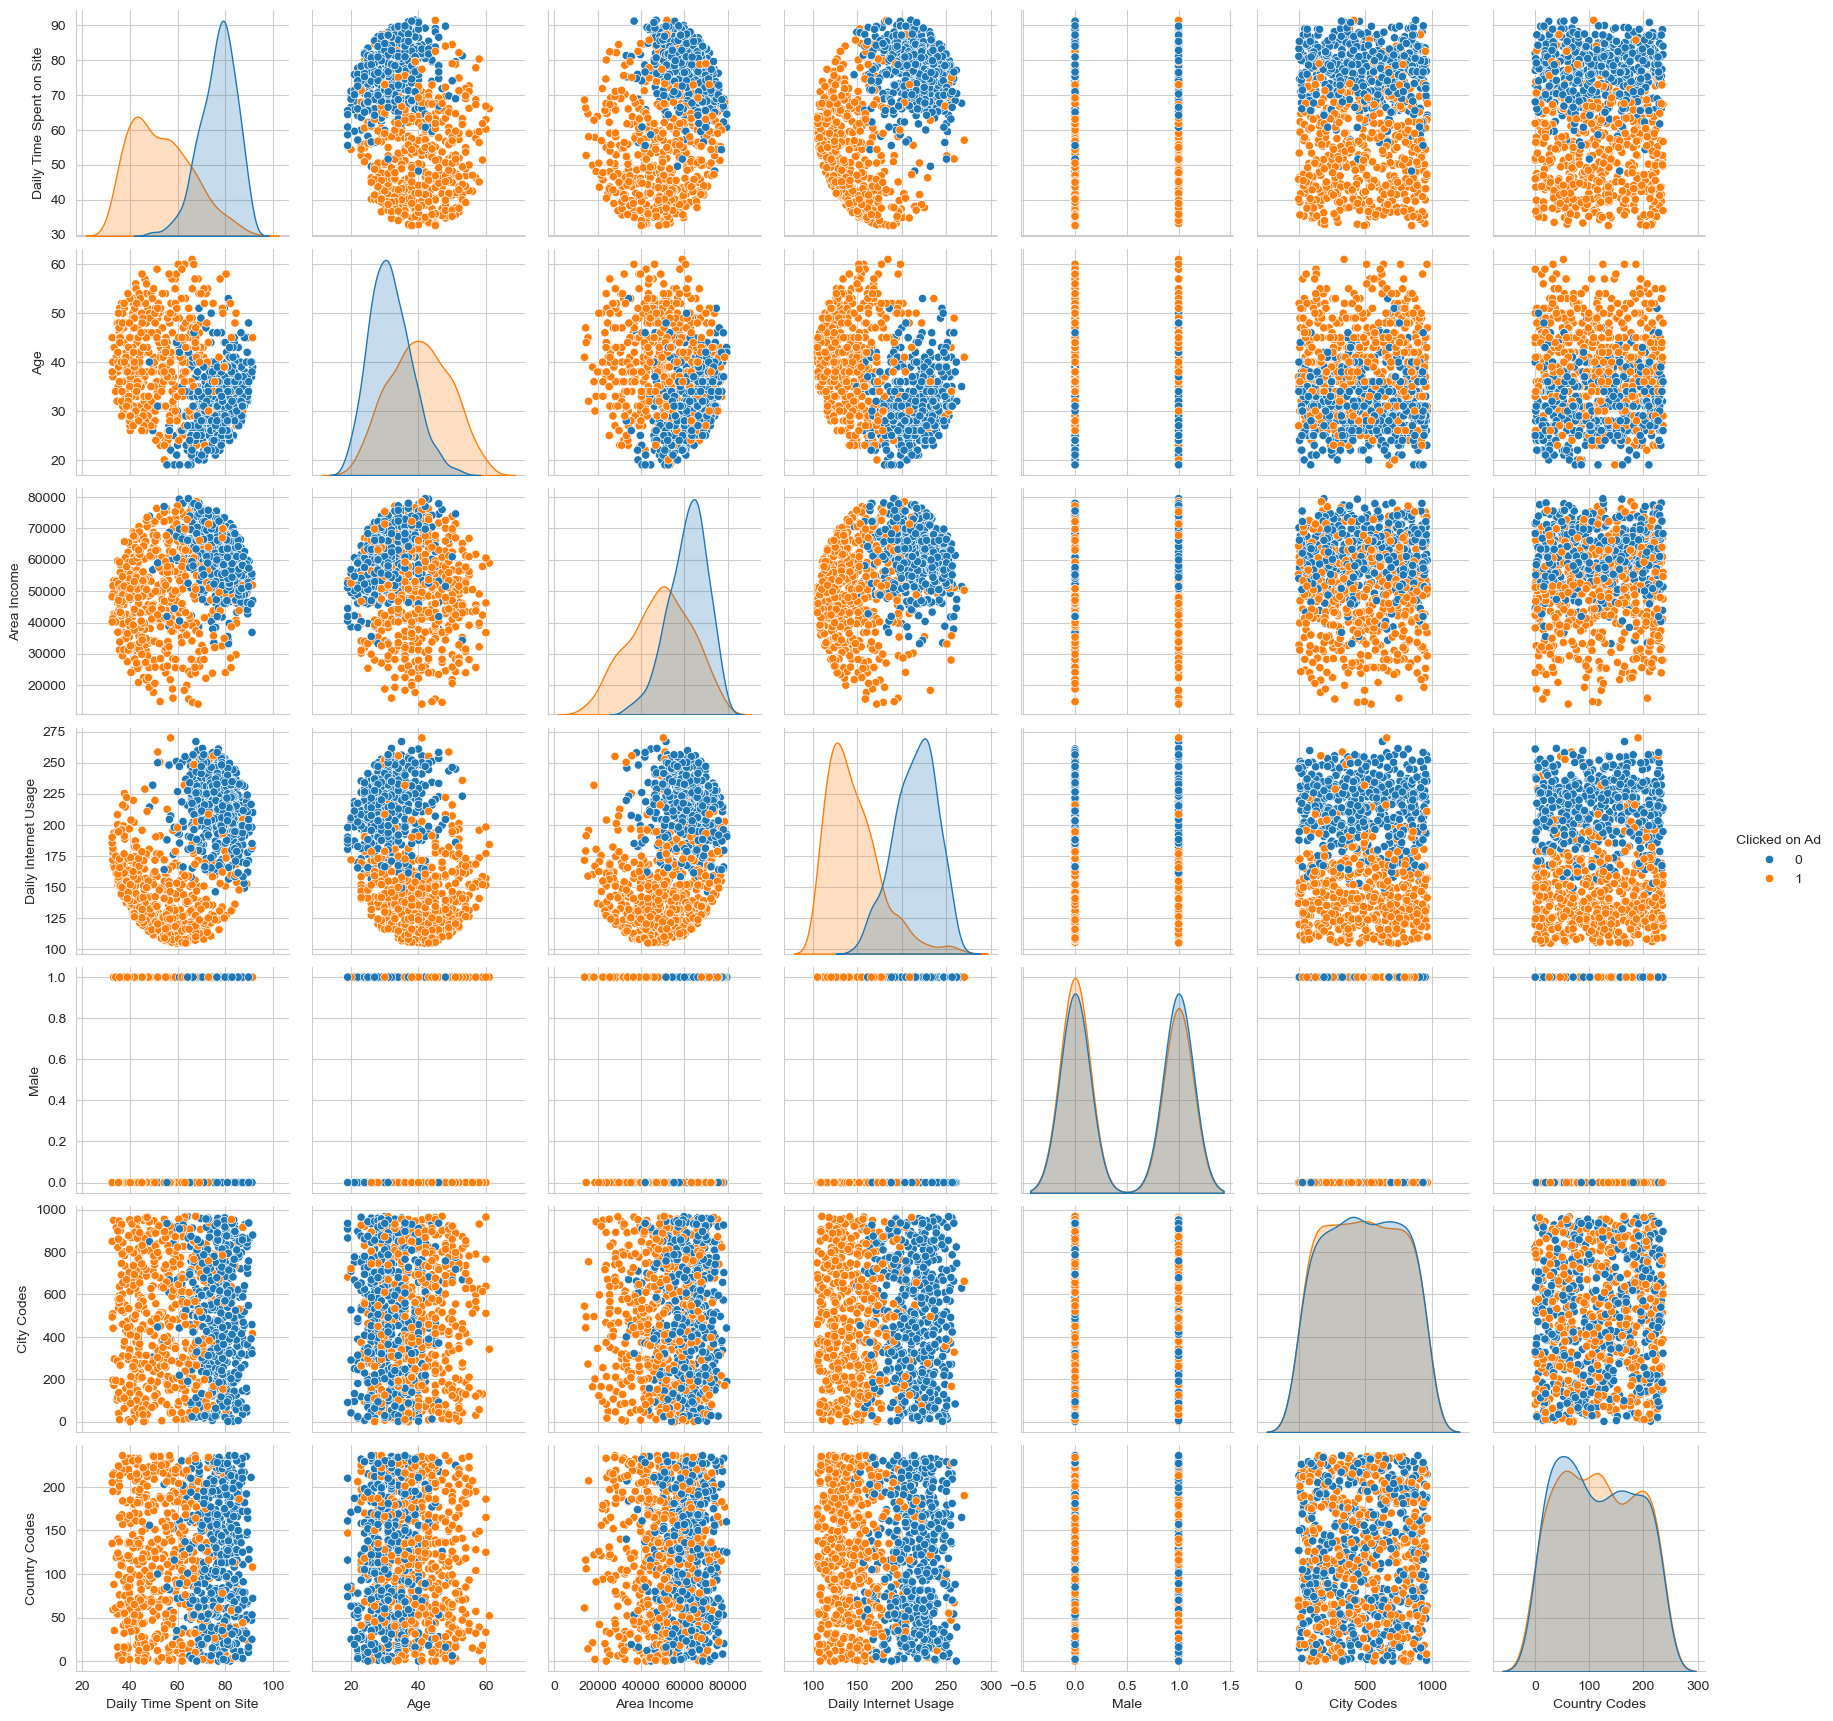

In [32]:
sns.pairplot(ad_dataset, hue='Clicked on Ad')

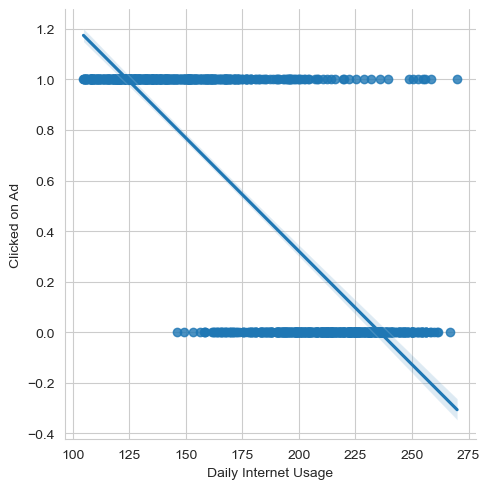

In [33]:
sns.lmplot(x="Daily Internet Usage", y="Clicked on Ad", data=ad_dataset)

## 6. Implementing Logestic Regression

In [35]:
X= ad_dataset[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male','City Codes','Country Codes','Month','Hour']]

Y= ad_dataset[['Clicked on Ad']]

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=65)

In [37]:
lrmodel= LogisticRegression()
lrmodel.fit(X_train,Y_train)

LogisticRegression()

In [38]:
Prediction= lrmodel.predict(X_test)

## 6. Testing Metrics

In [40]:
print (metrics.classification_report(Y_test,Prediction))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       146
           1       0.99      0.87      0.92       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [81]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(lrmodel, file)